***DISEASES SYMPTOMS PREDICTION***

**Importing of Dataset**

In [2]:
import pandas as pd

data = pd.read_csv('./Disease_symptom_and_patient_profile_dataset.csv')
data.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [3]:
data.shape

(349, 10)

The dataset has 349 rows and 10 columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


**DATA CLEANING**

First, we will check for null values.

In [5]:
data.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

We have no null values in our dataset.
Hence, we move to transforming our categorical data from object type to float type.

In [6]:
# using a function that will transform all columns except Disease column
# from sklearn.preprocessing import LabelEncoder
# 
# def transform_data(data):
#     label_encoder = LabelEncoder()
#     for column in data.columns:
#         if column != 'Disease':
#             if data[column].dtype == 'object':
#                 data[column] = label_encoder.fit_transform(data[column])
#             
#     return data
# 
# data = transform_data(data)
# data.head(10)

In [7]:
# data.info()

By using LabelEncoder, it has transformed all the categorical data into numerical form.

**Number of Diseases**

By use of unique values we can see different number of diseases in the Dataset.

In [8]:
data['Disease'].value_counts()

Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: Disease, Length: 116, dtype: int64

As per above, diseases like asthma, stroke, osteoporosis, hypertension and Diabetes are the most common. We have 116 different type of diseases.

***DATA VISUALIZATION***

Using seaborn and matplotlib libraries, we will visualize the data.

First, we will visualize the number of diseases.

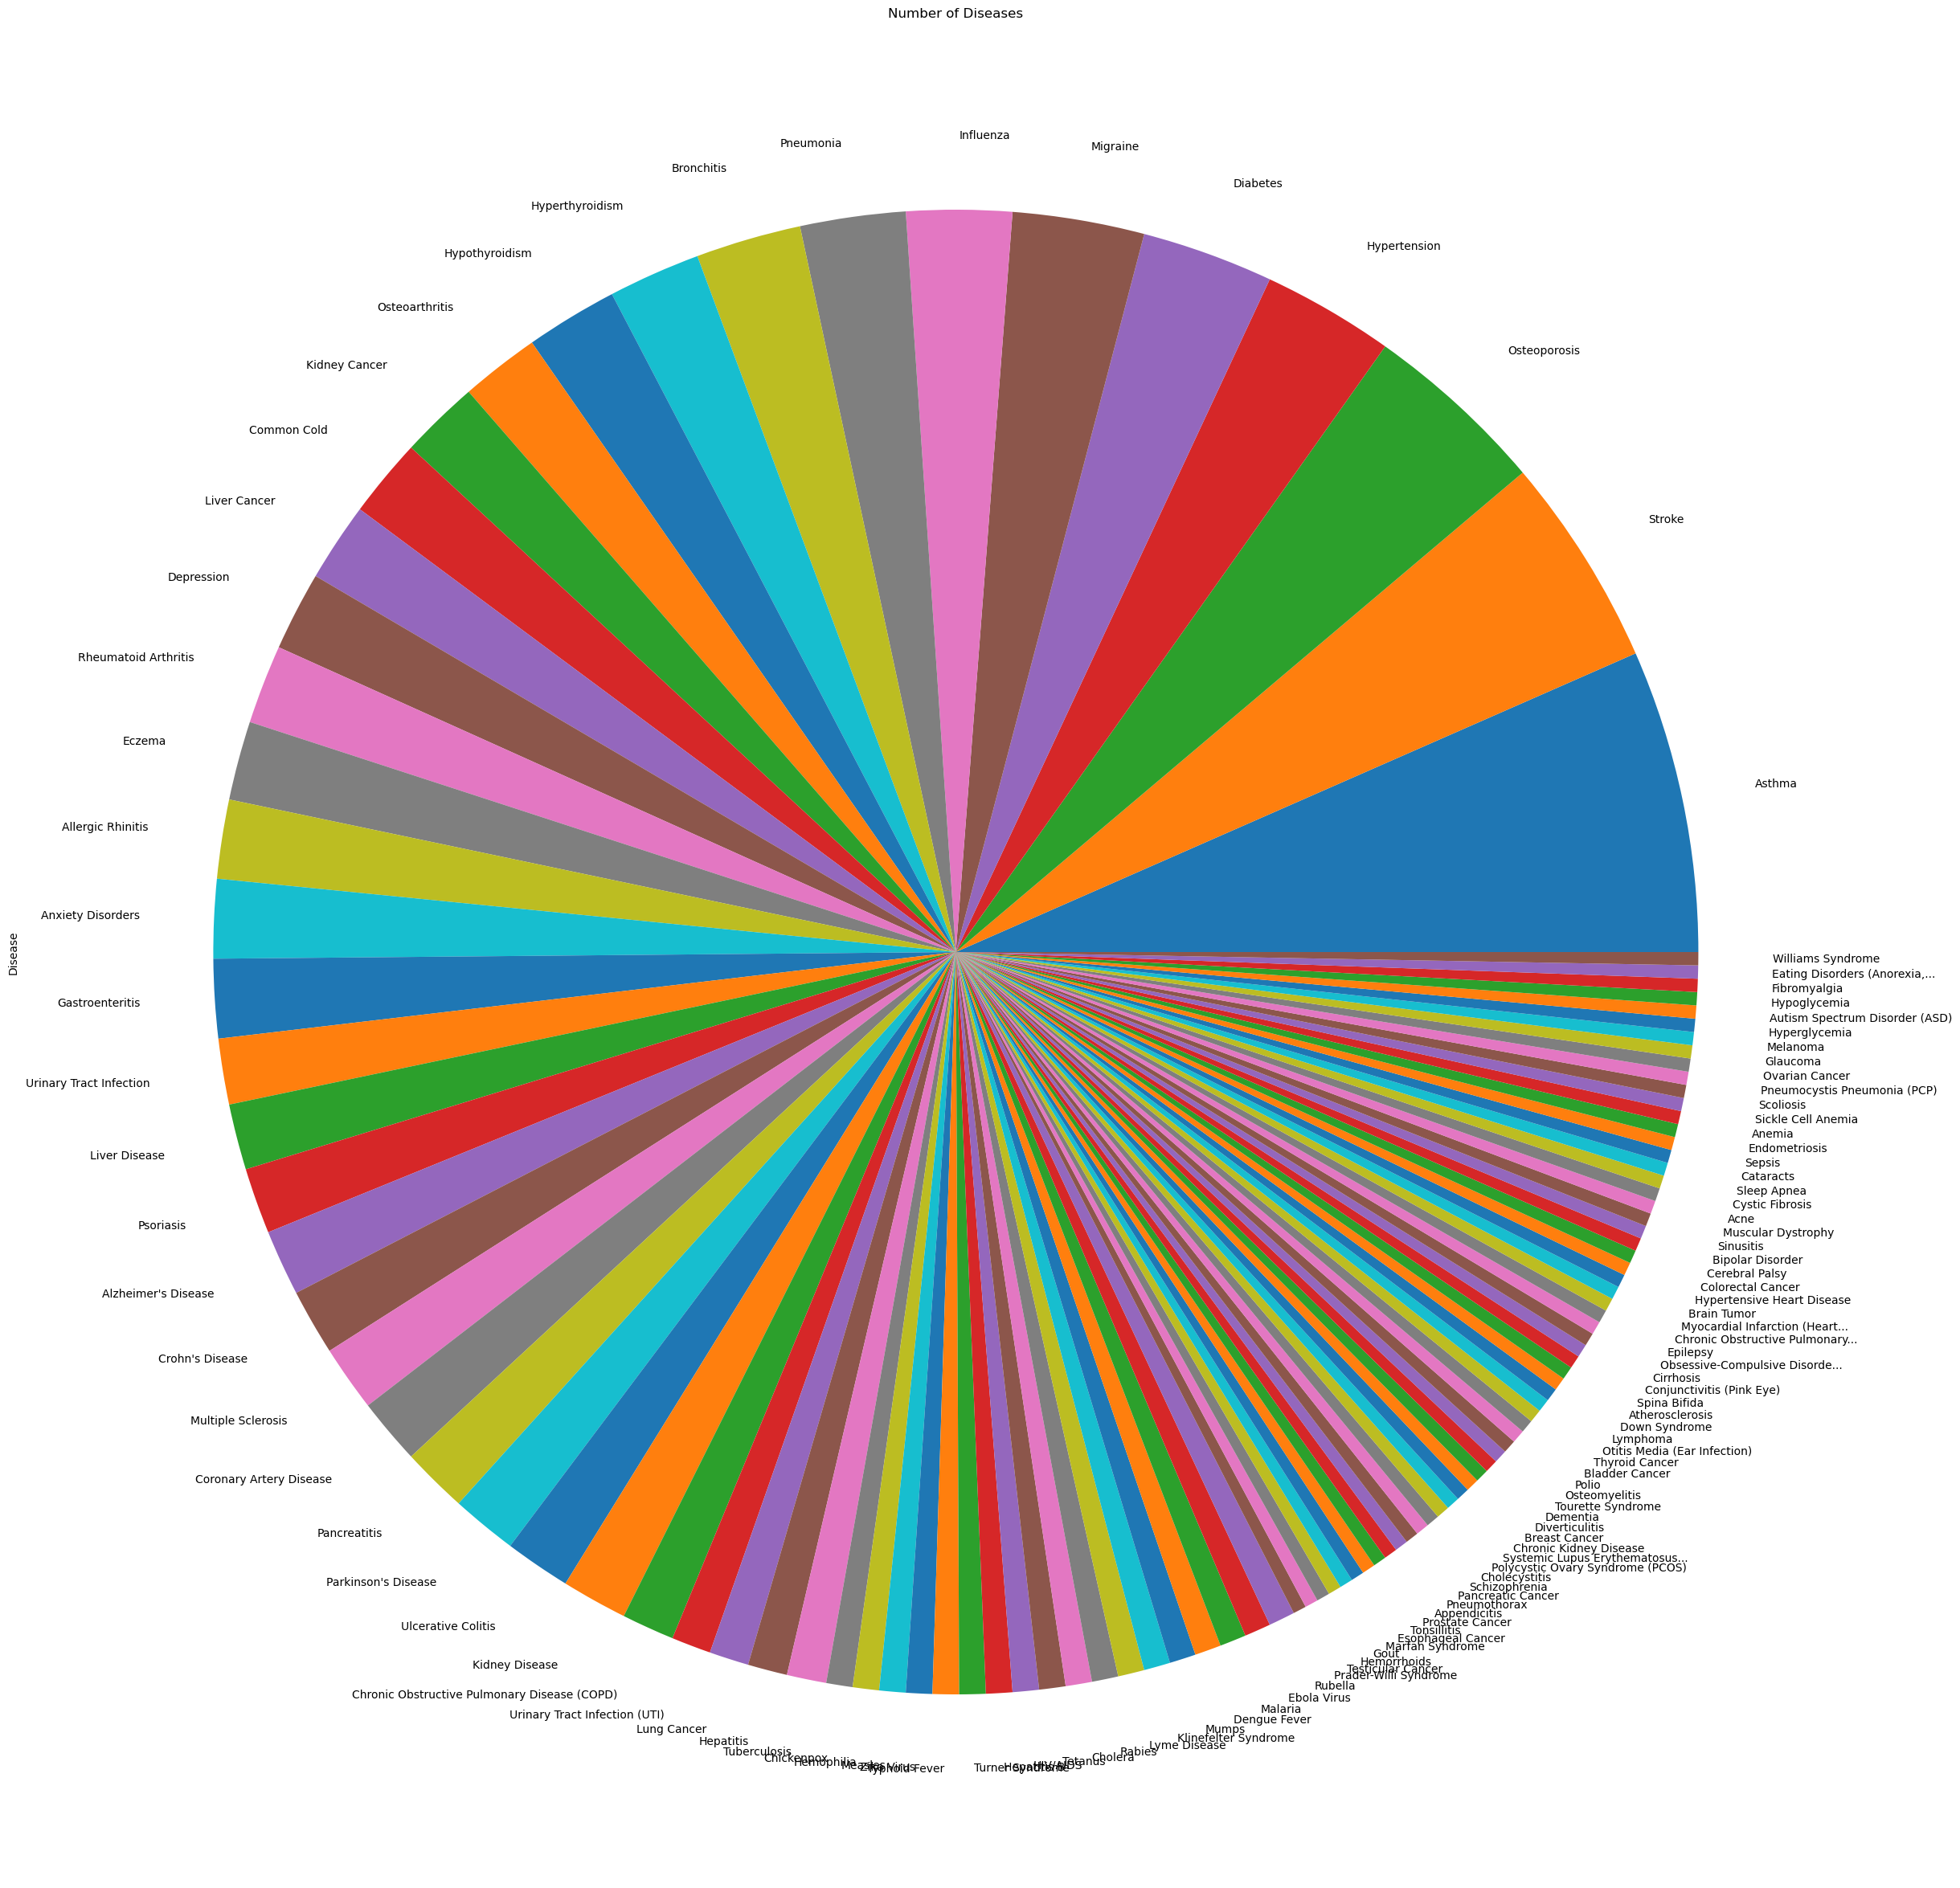

In [9]:

import matplotlib.pyplot as plt

disease_count = data['Disease'].value_counts()

disease_count.plot(kind='pie', figsize=(60, 30))
plt.xticks(rotation=60)
plt.title('Number of Diseases')
plt.show()

From the above pie chart, we can see that the most common diseases are asthma, stroke, osteoporosis, 
hypertension and Diabetes.Now we must check the variable outcome of the dataset. This will confirm if the 
patients tested positive or negative for the disease for Asthma patients.

Dealing with the outcome variable using a bar chart.

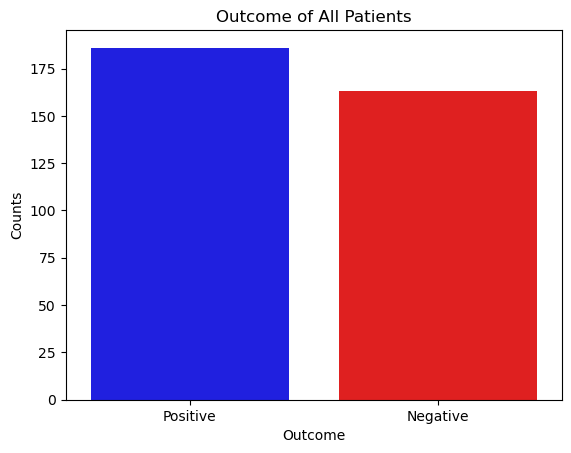

In [10]:
import seaborn as sns

positive_data = data[data['Outcome Variable'] == 'Positive']
negative_data = data[data['Outcome Variable'] == 'Negative']

#count of occurrence
positive_count = positive_data.shape[0]
negative_count = negative_data.shape[0]

sns.barplot(x=['Positive','Negative'],y=[positive_count, negative_count], palette=['blue','red'])
plt.title('Outcome of All Patients')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

In [11]:
data['Outcome Variable'].value_counts()

Positive    186
Negative    163
Name: Outcome Variable, dtype: int64

**Asthma Patients**

Asthma patients are the most in the dataset. Hence we will use them for further study on symptoms.

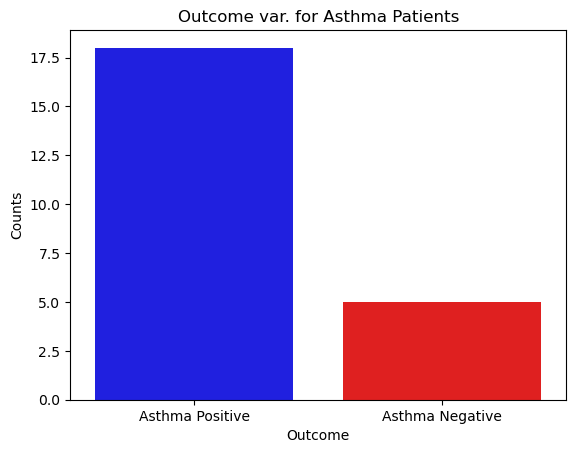

In [12]:
asthma_data = data[data['Disease'] == 'Asthma']

asthma_positive = asthma_data[asthma_data['Outcome Variable'] == 'Positive']
asthma_negative = asthma_data[asthma_data['Outcome Variable'] == 'Negative']

asthma_positive_count = asthma_positive.shape[0]
asthma_negative_count = asthma_negative.shape[0]

sns.barplot(x=['Asthma Positive','Asthma Negative'],y=[asthma_positive_count, asthma_negative_count], palette=['blue','red'])
plt.title('Outcome var. for Asthma Patients')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

18 patients tested positive as 5 tested negative. Lets check the asthma patients to the reffered questions.

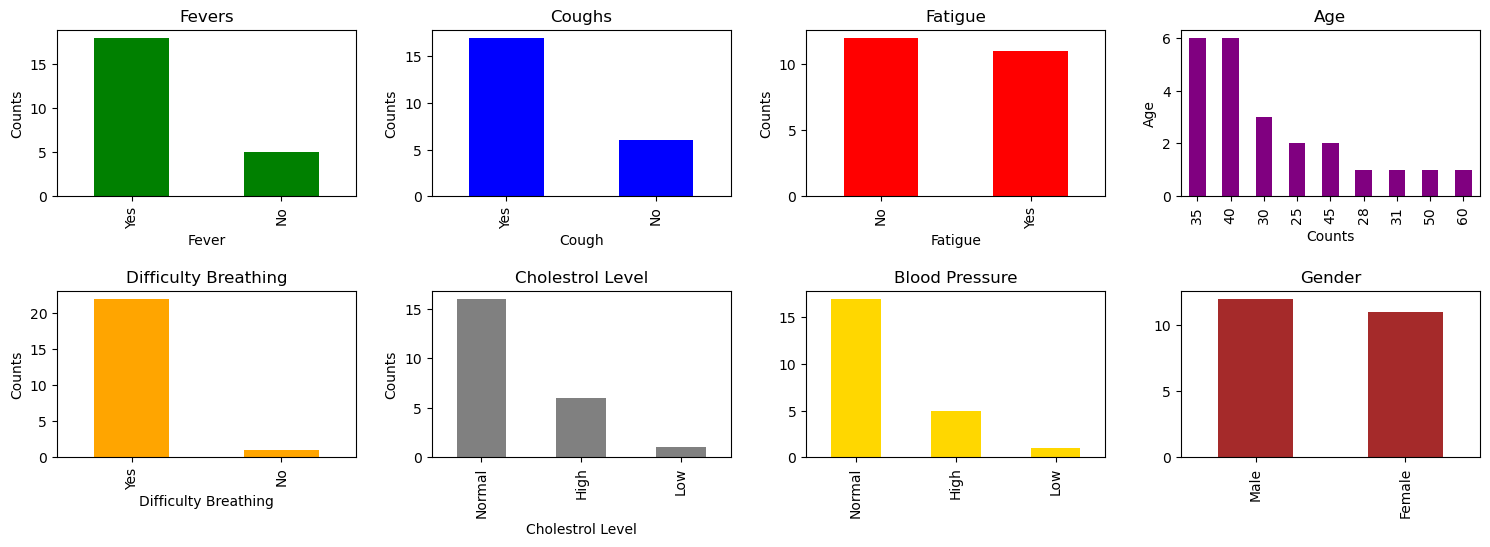

In [25]:
plt.figure(figsize=(15, 10))

#Plot 1: Fever
plt.subplot( 4, 4, 1)
asthma_data['Fever'].value_counts().plot(kind='bar', color='green')
plt.title('Fevers')
plt.xlabel('Fever')
plt.ylabel('Counts')

#Plot 2: Cough
plt.subplot(4, 4, 2)
asthma_data['Cough'].value_counts().plot(kind='bar', color='blue')
plt.title('Coughs')
plt.xlabel('Cough')
plt.ylabel('Counts')

#Plot 3: Fatigue
plt.subplot(4, 4, 3)
asthma_data['Fatigue'].value_counts().plot(kind='bar', color = 'red')
plt.title('Fatigue')
plt.xlabel('Fatigue')
plt.ylabel('Counts')

#Plot 4: Age
plt.subplot(4, 4, 4)
asthma_data['Age'].value_counts().plot(kind='bar', color='purple')
plt.title('Age')
plt.xlabel('Counts')
plt.ylabel('Age')

#Plot 5: Difficulty breathing
plt.subplot(4, 4, 5)
asthma_data['Difficulty Breathing'].value_counts().plot(kind='bar', color='orange')
plt.title('Difficulty Breathing')
plt.xlabel('Difficulty Breathing')
plt.ylabel('Counts')

#Plot 6: Cholestrol Level
plt.subplot(4, 4, 6)
asthma_data['Cholesterol Level'].value_counts().plot(kind='bar', color='gray')
plt.title('Cholestrol Level')
plt.xlabel('Cholestrol Level')
plt.ylabel('Counts')

#Plot 7: Blood  Pressure
plt.subplot(4, 4, 7)
asthma_data['Blood Pressure'].value_counts().plot(kind='bar', color='gold')
plt.title('Blood Pressure')

#Plot 7: Gender
plt.subplot(4, 4, 8)
asthma_data['Gender'].value_counts().plot(kind='bar', color='brown')
plt.title('Gender')

#Layout Adjust and show
plt.tight_layout()

plt.show()


The main reasons as per the graph for diagnosis of Asthma are Fevers, Coughs and Difficulty Breathing. As for Fatigue and Gender have some impact but to only 50% of the total population.
  

**Stroke**

We will now move to the second most common disease, Stroke. We will check the symptoms for the same.

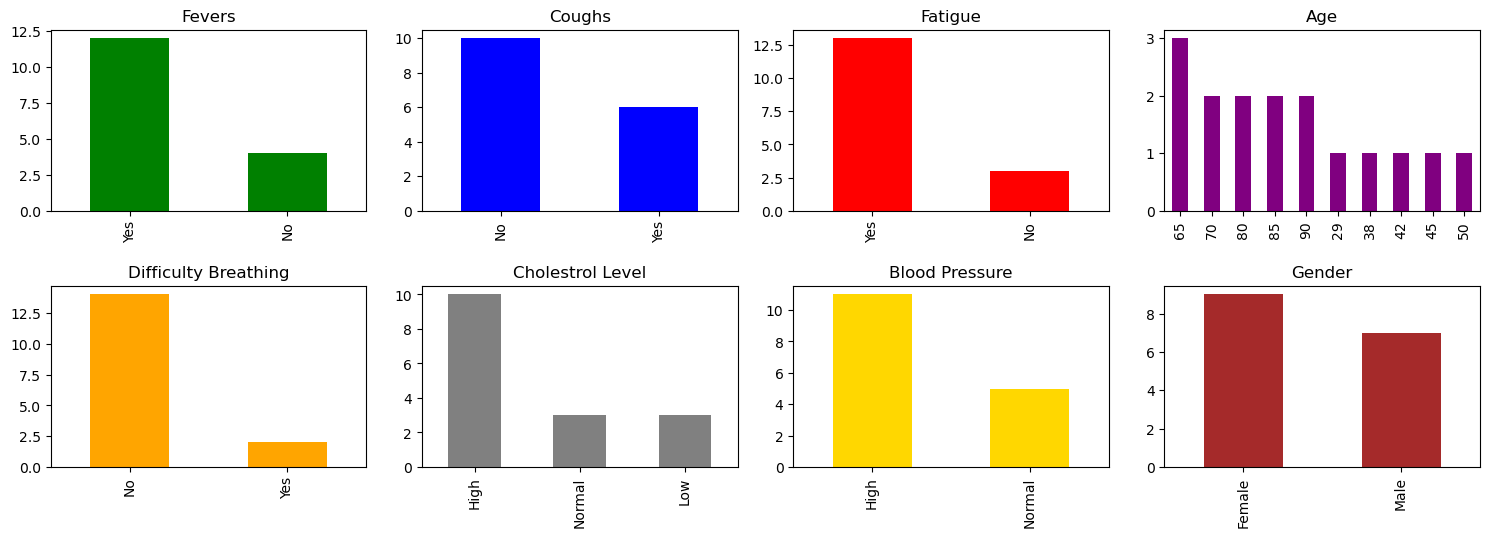

In [26]:
stroke_data = data[data['Disease'] == 'Stroke']

plt.figure(figsize=(15, 10))

#Plot 1: Fever
plt.subplot( 4, 4, 1)
stroke_data['Fever'].value_counts().plot(kind='bar', color='green')
plt.title('Fevers')

#Plot 2: Cough
plt.subplot(4, 4, 2)
stroke_data['Cough'].value_counts().plot(kind='bar', color='blue')
plt.title('Coughs')

#Plot 3: Fatigue
plt.subplot(4, 4, 3)
stroke_data['Fatigue'].value_counts().plot(kind='bar', color = 'red')
plt.title('Fatigue')

#Plot 4: Age
plt.subplot(4, 4, 4)
stroke_data['Age'].value_counts().plot(kind='bar', color='purple')
plt.title('Age')

#Plot 5: Difficulty breathing
plt.subplot(4, 4, 5)
stroke_data['Difficulty Breathing'].value_counts().plot(kind='bar', color='orange')
plt.title('Difficulty Breathing')

#Plot 6: Cholestrol Level
plt.subplot(4, 4, 6)
stroke_data['Cholesterol Level'].value_counts().plot(kind='bar', color='gray')
plt.title('Cholestrol Level')

#Plot 7: Blood  Pressure
plt.subplot(4, 4, 7)
stroke_data['Blood Pressure'].value_counts().plot(kind='bar', color='gold')
plt.title('Blood Pressure')

#plot 8: Gender
plt.subplot(4, 4, 8)
stroke_data['Gender'].value_counts().plot(kind='bar', color='brown')
plt.title('Gender')

#Layout Adjust and show
plt.tight_layout()

plt.show()


In [28]:
stroke_data['Outcome Variable'].value_counts()

Positive    11
Negative     5
Name: Outcome Variable, dtype: int64

<AxesSubplot: >

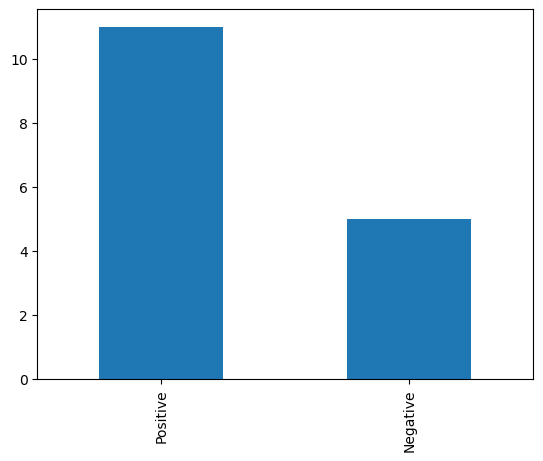

In [32]:
stroke_data['Outcome Variable'].value_counts().plot(kind='bar')